In [7]:
import os
import pandas as pd

from project.input.resources import resources_data
from project.model import get_inputs
from project.utils import subplots_attributes, subplots_pie, plot_attribute, plot_attribute2attribute
from project.utils import cumulated_plot,cumulated_plots

In [8]:
path = 'output/static'
if not os.path.isdir(path):
    os.mkdir(path)

In [9]:
output = 'output/description_stock'
if not os.path.isdir(output):
    os.mkdir(output)

## Loading inputs
Inputs come from the Res-IRF reference scenario.

In [10]:
inputs = get_inputs(path)

2022-09-30 15:37:24,608 - 24905 - log_static - INFO - Creating AgentBuildings object
2022-09-30 15:37:24,608 - 24905 - log_static - INFO - Creating AgentBuildings object


In [11]:
buildings = inputs['buildings']

## General description

In [12]:
stock = buildings.simplified_stock(energy_level=True)
stock = stock.groupby(['Occupancy status', 'Income owner', 'Income tenant', 'Housing type', 'Energy', 'Performance']).sum()

In [ ]:
plot_attribute(stock, )

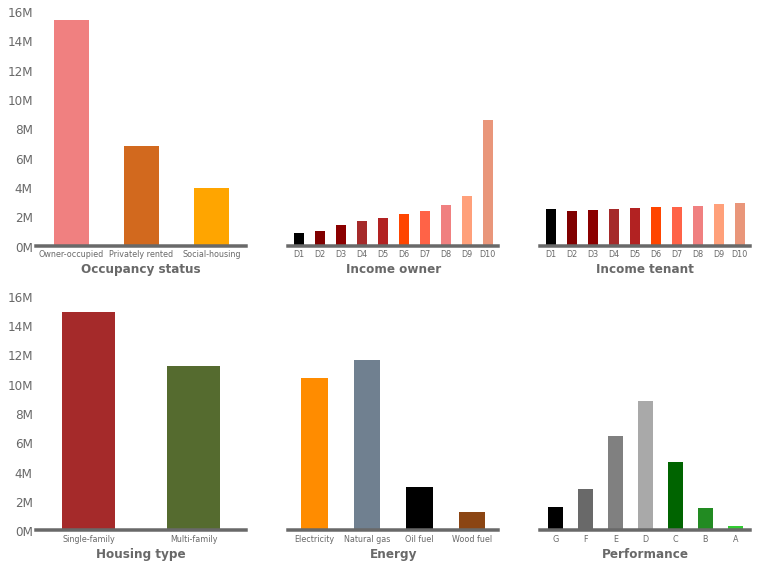

In [13]:
subplots_attributes(stock, dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, sharey=True)
subplots_attributes(stock, dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, sharey=True, save=os.path.join(output, 'stock_sdes2018_all.png'))

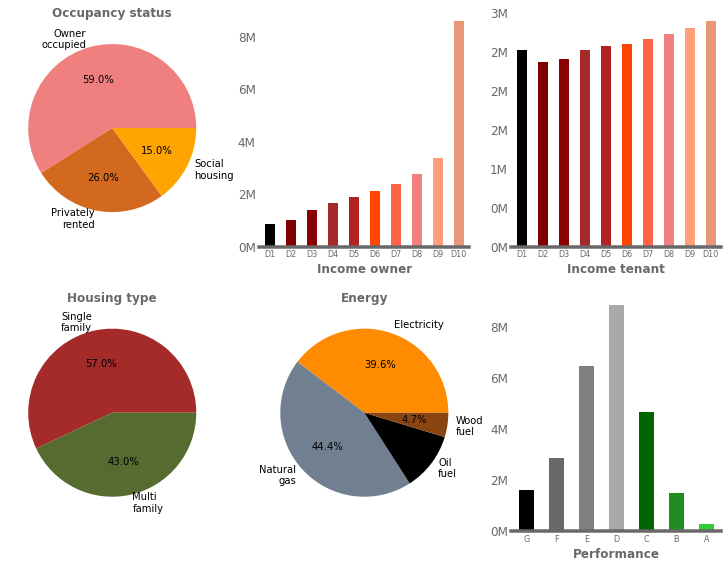

In [18]:
subplots_pie(stock, dict_order=resources_data['index'], pie=['Housing type', 'Energy', 'Occupancy status'], dict_color=resources_data['colors'], percent=False)


In [19]:
plot_attribute(stock, attribute='Performance', dict_order=resources_data['index'], percent=False, dict_color=resources_data['colors'], width=0.4,
               save='output/stock_sdes2018_energy_performance.png', figsize=(8.0, 6.0))

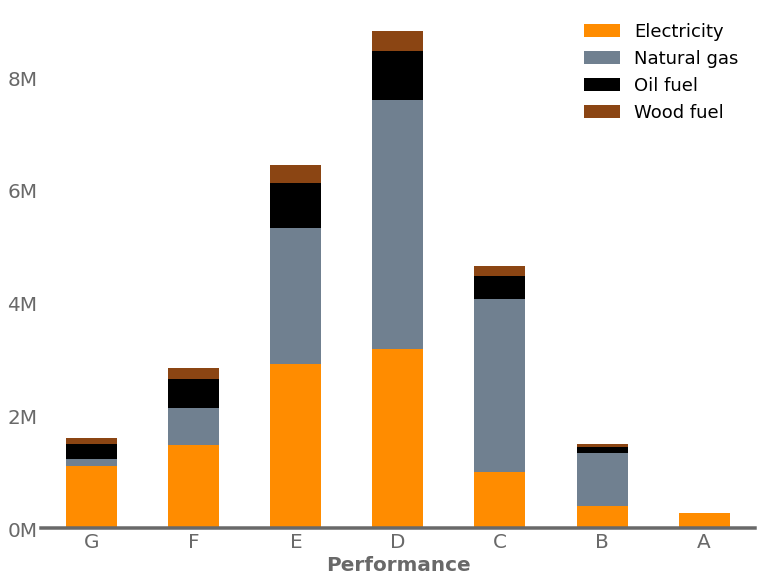

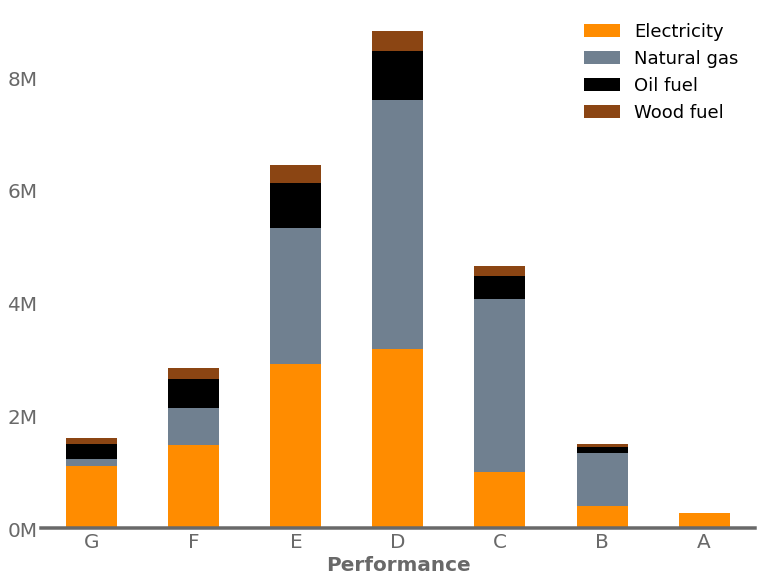

In [20]:
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'])
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False)
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, save='output/stock_sdes2018_dpe_energy.png')

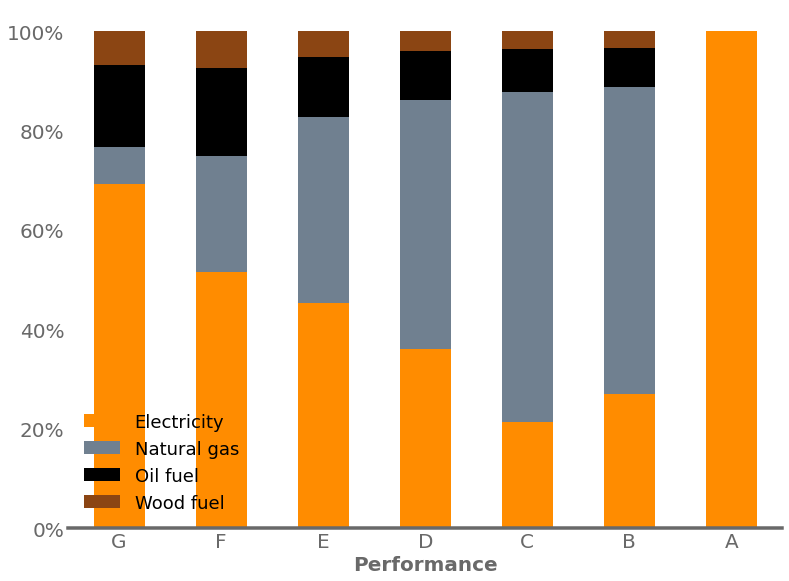

In [22]:
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True)

### Table

Energy by energy performance certificate

In [23]:
stock.groupby(['Performance', 'Energy']).sum().unstack('Energy')

Energy,Electricity,Natural gas,Oil fuel,Wood fuel
Performance,,,,
A,2.719475e+05,NaN,NaN,NaN
B,4.044452e+05,9.249447e+05,119499.328831,49907.741827
C,9.957906e+05,3.079008e+06,403508.186764,168521.301393
D,3.187205e+06,4.422417e+06,853973.603203,356653.836744
E,2.921526e+06,2.411488e+06,788321.540963,329234.886322
F,1.473983e+06,6.602216e+05,506860.175917,211685.262584
G,1.112649e+06,1.203295e+05,263597.613289,110089.000156


Energy by energy performance certificate (%)

In [24]:
(stock.groupby(['Performance', 'Energy']).sum().unstack('Energy').T / stock.groupby(['Performance', 'Energy']).sum().unstack('Energy').sum(axis=1)).T

Energy,Electricity,Natural gas,Oil fuel,Wood fuel
Performance,,,,
A,1.000000,NaN,NaN,NaN
B,0.269847,0.617125,0.079730,0.033299
C,0.214295,0.662604,0.086835,0.036266
D,0.361351,0.501394,0.096820,0.040436
E,0.452910,0.373841,0.122210,0.051040
F,0.516688,0.231433,0.177674,0.074204
G,0.692521,0.074894,0.164065,0.068520


## Description of the thermal performance

In [26]:
temp = dict()
for i in ['Wall', 'Floor', 'Roof', 'Windows']:
    y = pd.Series(buildings.stock.index.get_level_values(i), index=buildings.stock.index, name='{} insulation (W/m2.K)'.format(i)).astype('float')
    x = buildings.stock / 10**6
    temp.update({i: cumulated_plot(x, y, plot=False)})


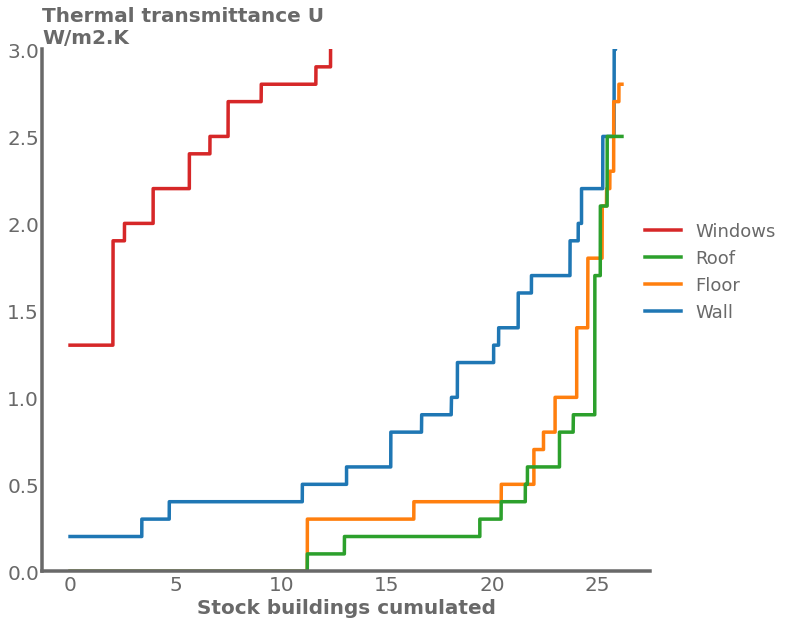

In [27]:
cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)